In [346]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [348]:
df=pd.read_csv("market_comments.csv")
df

,item_category,item_id,brand,user_id,date,comment,rating,tonality
0,401,4010201,826,2217,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",2.0,negative
1,403,4030101,1425,1026,2010-07-04,Через 2 месяца после истечении гарантийного ср...,2.0,negative
2,401,4010401,124,2769,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,4.0,positive
3,203,2030301,93,508,2016-10-11,Ребят этот системный блок подойдёт для игры кс...,5.0,positive
4,205,2050201,656,1049,2010-02-26,"я считаю, что яри замечательный телефон! Прият...",5.0,positive
...,...,...,...,...,...,...,...,...
14276,403,4030201,2159,2957,2010-08-28,Не плохая машинка за такие деньги. Очень хорош...,4.0,positive
14277,405,4050303,638,2957,2014-06-10,"Отличный кондиционер, работает тихо,в режиме н...",5.0,positive
14278,411,4110102,48,2947,2010-11-12,Пылесос отличный. Мощный-это раз. Не по-детски...,5.0,positive
14279,405,4050104,617,1225,2017-07-10,Три скорости,1.0,negative


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14281 entries, 0 to 14280
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_category  14281 non-null  int64  
 1   item_id        14281 non-null  int64  
 2   brand          14281 non-null  int64  
 3   user_id        14281 non-null  int64  
 4   date           14281 non-null  object 
 5   comment        14281 non-null  object 
 6   rating         14281 non-null  float64
 7   tonality       14281 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 892.7+ KB


In [350]:
df.isnull().sum()

item_category    0
item_id          0
brand            0
user_id          0
date             0
comment          0
rating           0
tonality         0
dtype: int64

In [351]:
df.columns

Index(['item_category', 'item_id', 'brand', 'user_id', 'date', 'comment',
       'rating', 'tonality'],
      dtype='object')

In [352]:
df['tonality'].unique()

array(['negative', 'positive'], dtype=object)

In [353]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [354]:
for i in range(10):
    print(df['comment'][i])
    print()

2,5 года работала и все...устала! Лампочка горит и больше ничего!

Через 2 месяца после истечении гарантийного срока машинка навернулась. Насчитали ремонту на 5500р! Причем брал её итальянской сборки!  Сама машинка была нормальная, правда после стирки снова прополаскивал, но это пожалуй про любую так скажешь - плохо выполаскивается порошок, хотя и сыплю/лью по инструкции и не фигню какую...  А мастер авторизованного сервис-центра поведал мне много интересного... Нет смысла переплачивать сегодня за европейскую страну изготовителя, нет смысла приобретать машинки дороже 12-15 тыс., и что сейчас все производители заведомо делают машинки, чтобы те ломались побыстрее ( в среднем раз в 3-4 года!!!) тем самым стимулируя спрос на новые... Единственное, что еще живо в отношении реального КАЧЕСТВА, так это пожалуй немецкое "Миеле" (Бош кстати давно в пролете уже, скатился), но и они конечно тоже ломаются даже при стоимости в 100000... Вывод: Берем стиралку недорогую, тыщ за 8-10, и НЕ СИЛЬНО ОГОР

In [356]:
sns.set(style="whitegrid")

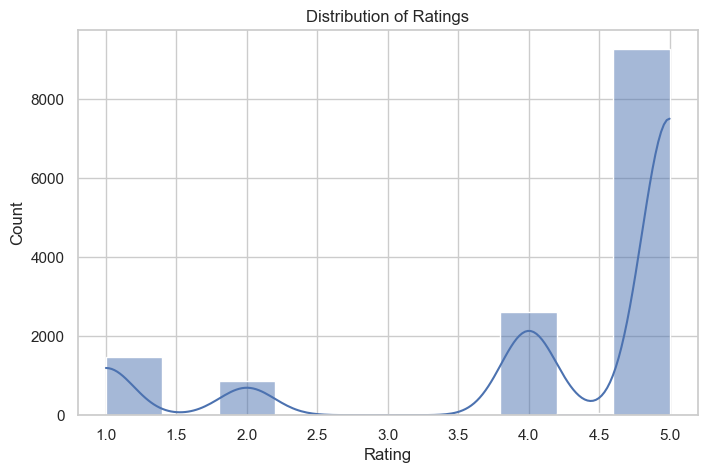

In [270]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10936\1835259377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tonality', data=df, palette='Set2')


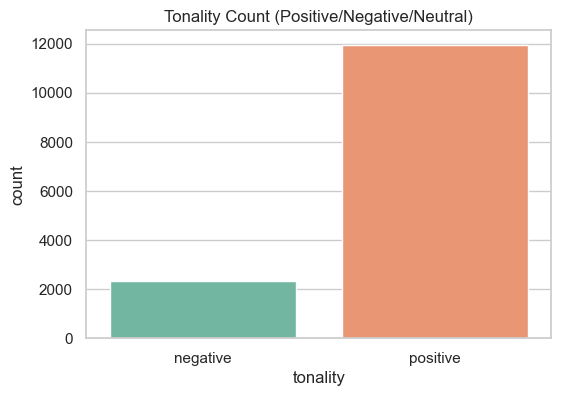

In [274]:
plt.figure(figsize=(6, 4))
sns.countplot(x='tonality', data=df, palette='Set2')
plt.title("Tonality Count (Positive/Negative/Neutral)")
plt.show()


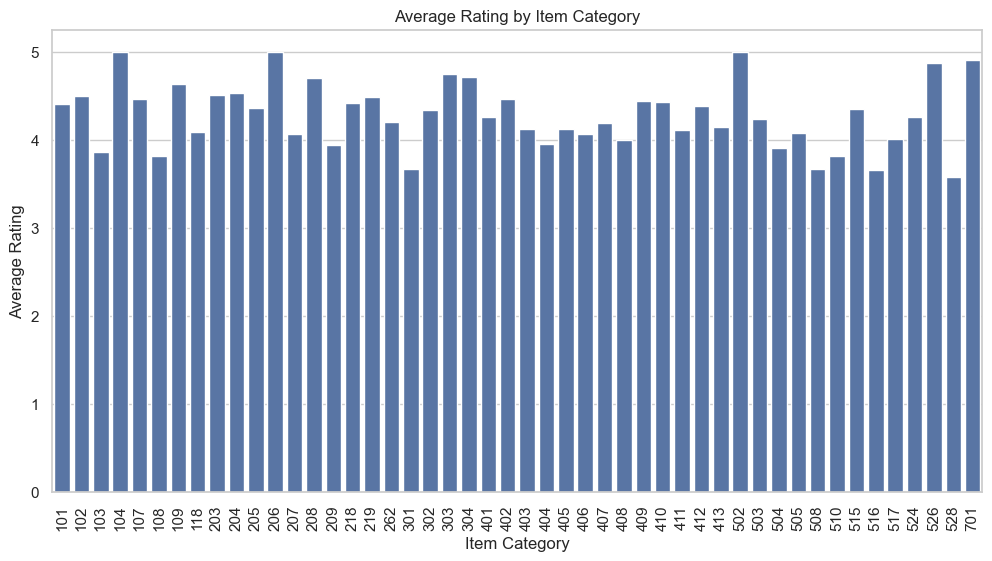

In [276]:
plt.figure(figsize=(12, 6))
avg_rating_cat = df.groupby('item_category')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_cat.index, y=avg_rating_cat.values)
plt.title("Average Rating by Item Category")
plt.xlabel("Item Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


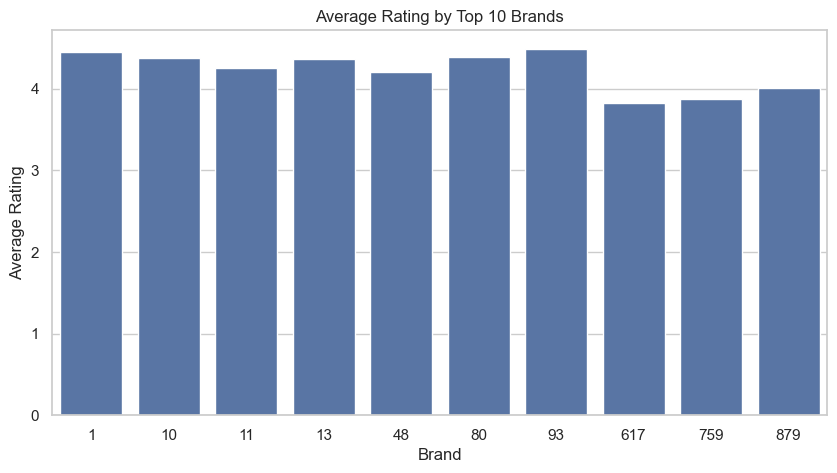

In [277]:
top_brands = df['brand'].value_counts().nlargest(10).index
brand_rating = df[df['brand'].isin(top_brands)].groupby('brand')['rating'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=brand_rating.index, y=brand_rating.values)
plt.title("Average Rating by Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10936\1494098705.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['rating'].mean().plot()


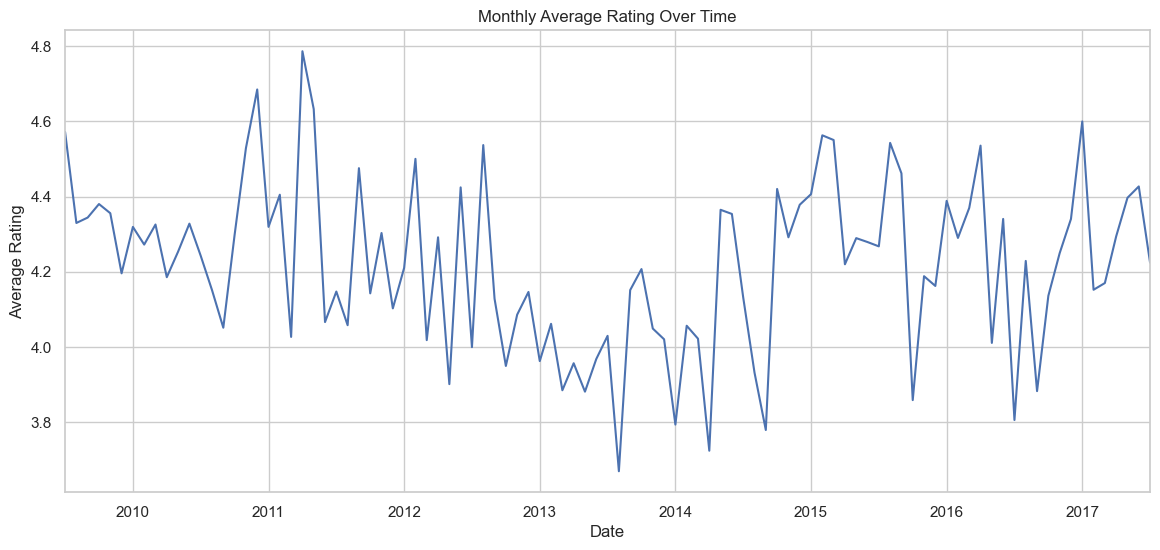

In [279]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 6))
df.set_index('date').resample('M')['rating'].mean().plot()
plt.title("Monthly Average Rating Over Time")
plt.ylabel("Average Rating")
plt.xlabel("Date")
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10936\926244467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


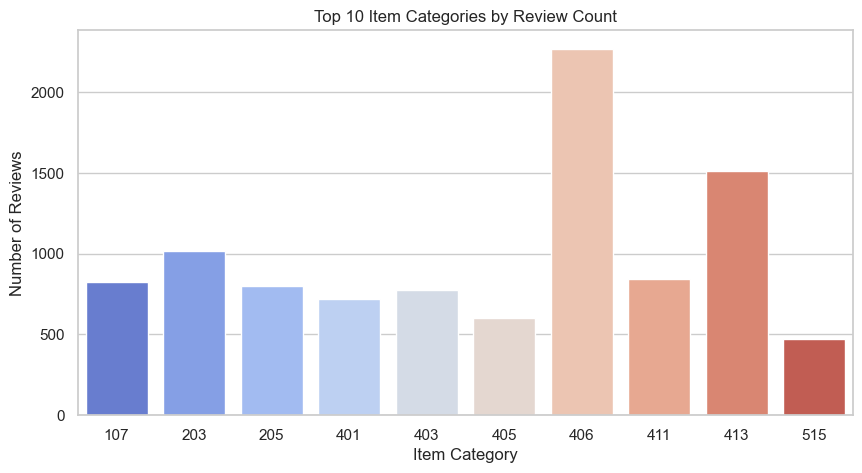

In [281]:
top_categories = df['item_category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')
plt.title("Top 10 Item Categories by Review Count")
plt.xlabel("Item Category")
plt.ylabel("Number of Reviews")
plt.show()


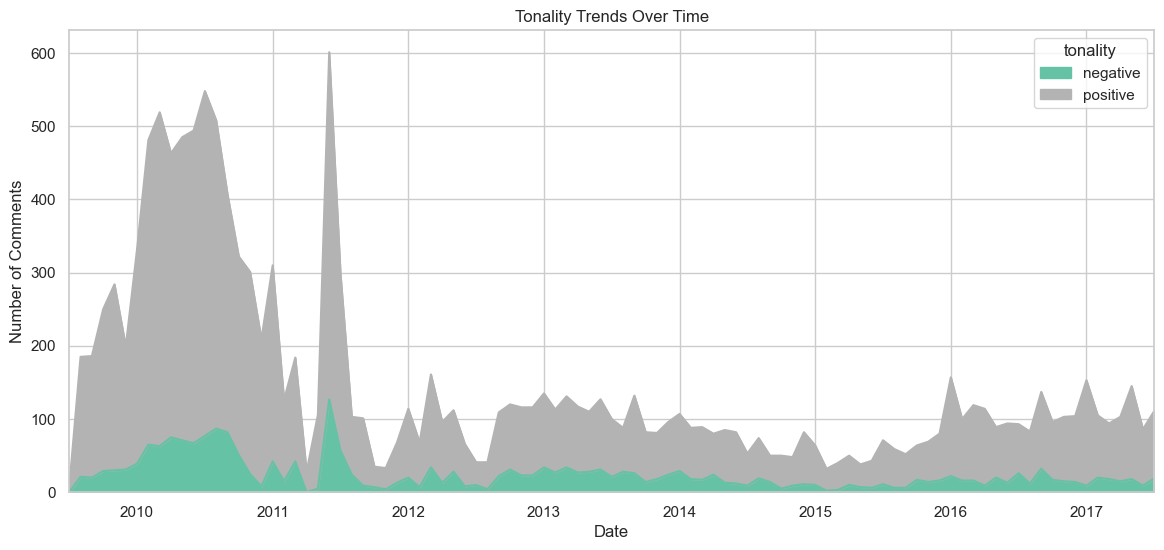

In [282]:
tonality_over_time = df.groupby([df['date'].dt.to_period('M'), 'tonality']).size().unstack().fillna(0)
tonality_over_time.index = tonality_over_time.index.to_timestamp()

tonality_over_time.plot.area(figsize=(14, 6), colormap='Set2')
plt.title("Tonality Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.show()


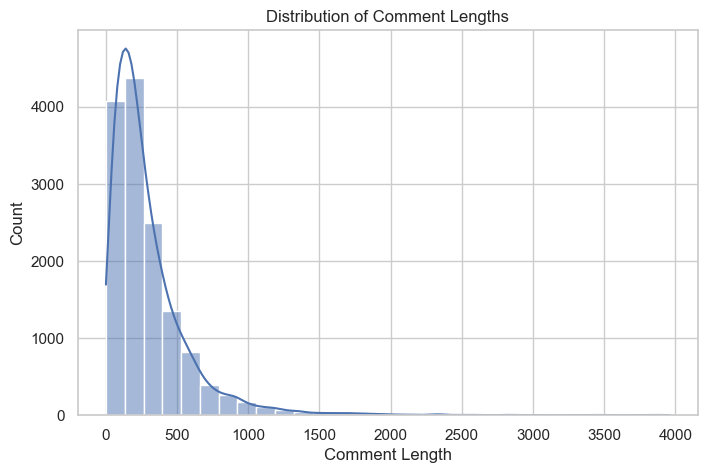

In [283]:
df['comment_length'] = df['comment'].str.len()

plt.figure(figsize=(8, 5))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length")
plt.ylabel("Count")
plt.show()


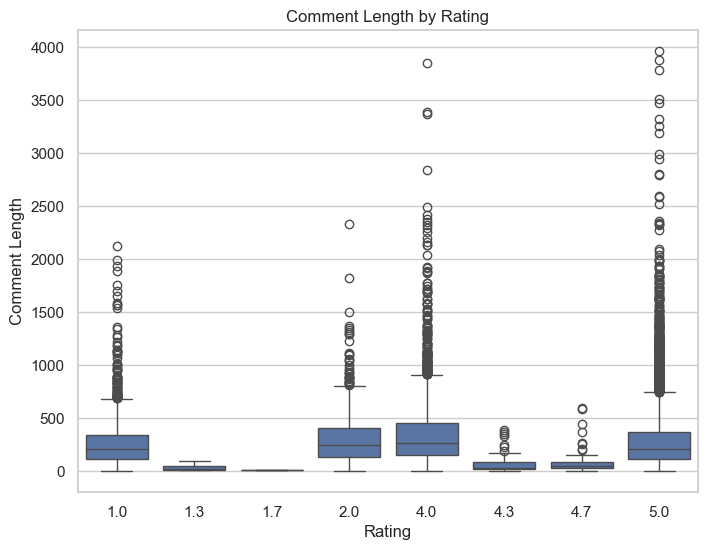

In [284]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='comment_length', data=df)
plt.title("Comment Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Comment Length")
plt.show()


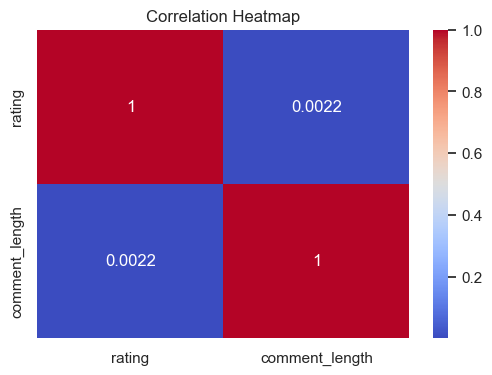

In [285]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['rating', 'comment_length']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [286]:
corr_matrix = df.corr(numeric_only=True)

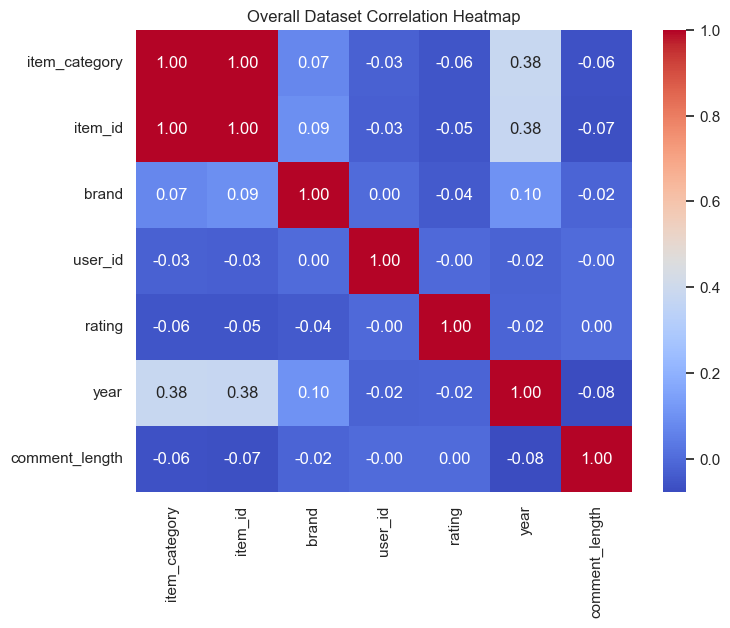

In [287]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Overall Dataset Correlation Heatmap")
plt.show()

In [288]:
df['tonality'].unique()

array(['negative', 'positive'], dtype=object)

In [289]:
def con(x):
    if x=="negative":
        return 0
    else:
        return 1
    

In [290]:
df['tonality'].apply(con)

0        0
1        0
2        1
3        1
4        1
        ..
14276    1
14277    1
14278    1
14279    0
14280    1
Name: tonality, Length: 14281, dtype: int64

In [292]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [293]:
def preprocess(sentence):
    # Use Russian stopwords
    russian_stopwords = stopwords.words('russian')

    # Remove all non-alphanumeric characters (English & Russian)
    text = re.sub(r"[^a-zA-Zа-яА-Я0-9]", ' ', str(sentence)).split()

    # Convert to lowercase and remove stopwords
    words = [x.lower() for x in text if x.lower() not in russian_stopwords]

    # Initialize lemmatizer (English; optional for Russian)
    lemma = WordNetLemmatizer()
    lemmatized = [lemma.lemmatize(word, 'v') for word in words]

    return ' '.join(lemmatized)

In [295]:
df['comment']=df['comment'].apply(preprocess)

In [296]:
for i in range(10):
    print(df['comment'][i])
    print()

2 5 года работала устала лампочка горит

2 месяца истечении гарантийного срока машинка навернулась насчитали ремонту 5500р причем брал е итальянской сборки сама машинка нормальная правда стирки снова прополаскивал это пожалуй любую скажешь плохо выполаскивается порошок хотя сыплю лью инструкции фигню какую мастер авторизованного сервис центра поведал интересного смысла переплачивать сегодня европейскую страну изготовителя смысла приобретать машинки дороже 12 15 тыс производители заведомо делают машинки те ломались побыстрее среднем 3 4 года самым стимулируя спрос новые единственное живо отношении реального качества это пожалуй немецкое миеле бош кстати давно пролете скатился ломаются стоимости 100000 вывод берем стиралку недорогую тыщ 8 10 сильно огорчаемся истечению 3х летней самсунговской гарантии придется выбрасывать снова покупать

пользуюсь недели нареканий каких положительные эмоции вчера загрузил машинку посудой засыпал средство стал закрывать крышечку закрывается е эдак закрыва

In [297]:
x=df['comment']
y=df['tonality']

In [298]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [299]:
tf=TfidfVectorizer()

In [300]:
x=tf.fit_transform(x)

In [301]:
from sklearn.model_selection import train_test_split

In [303]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [304]:
from sklearn.naive_bayes import MultinomialNB

In [305]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [332]:
model.score(x_train,y_train)

0.8355217086834734

In [334]:
y_pred=model.predict(x_test)

In [336]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [338]:
accuracy_score(y_test,y_pred)

0.8463423171158558

In [340]:
c=confusion_matrix(y_test,y_pred)
c

array([[   0,  439],
       [   0, 2418]], dtype=int64)

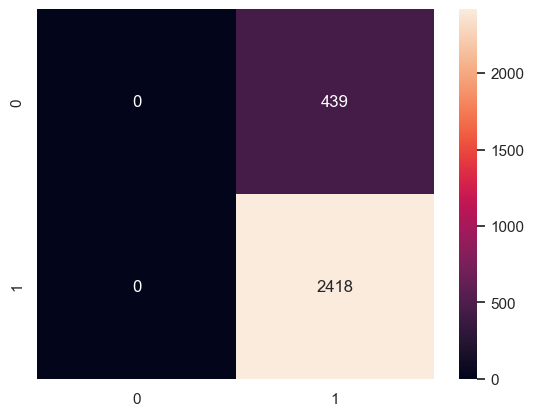

In [342]:
sns.heatmap(c,annot=True,fmt="d")
plt.show()

In [344]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       439
    positive       0.85      1.00      0.92      2418

    accuracy                           0.85      2857
   macro avg       0.42      0.50      0.46      2857
weighted avg       0.72      0.85      0.78      2857



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
